# Two-gamma cascade model
##### Nick Mast - Feb 2020

This note presents a simple analytic model of the recoil energy distribution expected for a composite recoil cascade. We assume a recoiling nucleus has only 2 transitions to get to the ground state and the nucleus recoils in a random direction at each transition.

## Kinematics
Let's call the energies of the first and second emitted gamma $E_{\gamma,1}$ and $E_{\gamma,2}$ respectively. With each recoil, the nucleus receives momentum $p=E_\gamma/c$ in some direction. These are low enough that the revcoiling Si nucleus is nonrelativistic, $v/c\sim0.001$. For this reason, we'll also assume that the stopping power is, $\frac{\partial E}{\partial x}$ is constant.

The nucleus experiences the first decay at $t=0$ while at rest. The decay imparts momentum $p=E_{\gamma,1}/c$ and the nucleus recoils with kinetic energy $E(t=0)=\frac{E_{\gamma,1}^2}{2mc^2}$ and velocity $v(t=0)=E_{\gamma,1}/mc$. It then starts to slow through interactions with the crystal. For constant $\frac{\partial E}{\partial x}$, the acceleration is $a=\frac{-1}{m}\frac{\partial E}{\partial x}$. We can combine these to calclulate the total energy deposited as a function of time

\begin{equation}
    E_{dep,1}(t)=x(t)\frac{\partial E}{\partial x} = \left(\frac{E_{\gamma,1}}{mc}t-\frac{1}{2m}\frac{\partial E}{\partial x}t^2 \right) \frac{\partial E}{\partial x}
\end{equation}

The second gamma decay occurs at some later time, $t_d$. If the first recoil comes to a stop before the second recoil occurs, then the total deposited energy is easy to calculate as

\begin{equation}
    E_{dep}(t_d) = \frac{E_{\gamma,1}^2+E_{\gamma,2}^2}{2mc^2},\enspace t_d>t_{stop}
\end{equation}

where $t_{stop}=\frac{E_{\gamma,1}}{c}\left( \frac{\partial E}{\partial x} \right)^{-1}$ is the time it would take the nucleus to come to a stop from the initial recoil. Of course we're more interested in the case where the second decay occurs in-flight. Then, the remaining momentum from the first decay will be $p_1(t_d)=E_{\gamma,1}/c-\frac{\partial E}{\partial x}t_d$. The second decay imparts additional momentum $p_2=E_{\gamma,2}/c$ in a direction which differs from $p_1$ by some angle $\phi$. In this case, the resulting total momentum of the nucleus immediately after the second decay is

\begin{equation}
    p^2(t_d)=p_1^2(t_d)+p_2^2+2p_1(t_d)p_2\cos(\phi)
\end{equation}

Now, all of the energy from this second decay will get deposited. So to find the total deposited energy during the cascade sequence we take
\begin{equation}
    E_{dep}(t_d,\phi)=E_{dep,1}(t_d)+E_{dep,2}(t_d,\phi) = \left(\frac{E_{\gamma,1}^2}{mc^2}-\frac{p_1^2(t_d)}{2m} \right)+\frac{p^2(t_d)}{2m},\enspace t_d<t_{stop}
\end{equation}

which simplifies to

\begin{equation}
    E_{dep}(t_d,\phi) = \frac{E_{\gamma,1}^2+E_{\gamma,2}^2}{2mc^2} + \frac{E_{\gamma,1}E_{\gamma,2}}{mc}(1-\frac{t_d}{t_{stop}})\cos(\phi),\enspace t_d<t_{stop}
\end{equation}

A plot of this is shown below.

In [1]:
exec(open("nb_setup.py").read());

../mplstyles
3.1.1
/data/chocula/mast/cdms/analysis/run068/R68_paper2019/mplstyles


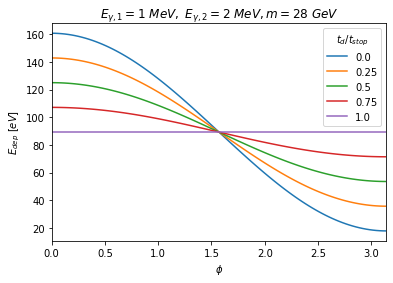

In [3]:
import numpy as np
import matplotlib.pyplot as plt

#Use c=1 units for energies and mass
def E_dep(td, phi, Eg1, Eg2, dEdx, m):
    tstop=Eg1/dEdx
    return (Eg1**2+Eg2**2)/(2*m) + (td<tstop)*(Eg1*Eg2/m)*(1-td/tstop)*np.cos(phi)

fig, ax = plt.subplots()

phi=np.linspace(0,np.pi,100)

Eg1=1e6 #[eV]
Eg2=2e6 #[eV]
dEdx=230e9 #[eV/m]
m=28e9# [eV]

tstop=Eg1/dEdx
for tdi in np.linspace(0,tstop,5):
    ax.plot(phi,E_dep(tdi, phi, Eg1, Eg2, dEdx, m),label=str(tdi/tstop))

#ax.set_prop_cycle(None)#Reset color cycle
#tstop=2*Eg1/dEdx
#for tdi in np.linspace(0,tstop,3):
#    ax.plot(phi,E_dep(tdi, phi, 2*Eg1, Eg2, dEdx, m),'--',linewidth=2)


ax.legend(title=r'$t_d/t_{stop}$')

ax.set_xlabel(r'$\phi$')
ax.set_xlim(0,np.pi)

ax.set_ylabel(r'$E_{dep}~[eV]$')
#ax.set_ylim(0,6)

ax.set_title(r'$E_{\gamma,1}=1~MeV,~E_{\gamma,2}=2~MeV,m=28~GeV$');

plt.savefig('figures/n2gamma_Edep_v_phi.png')

We see that for long decay times, the angle doesn't matter and we get the quadrature sum of the energies. For short decay times, a boost along the same direction as the initial decay enhances the deposited energy. If the decays are perpindicular, we also recover the quadrature sum of energies as expected.

## Probabilities
Now we want to see how likely each recoil energy is, that is, we want the probability density function (PDF), $f_E(E)$. We know the PDFs for $t_d$ and $\cos(\phi)$ are

\begin{equation}
    f_{t_d}=\frac{1}{\tau}\exp(-t_d/\tau)\Theta(t_d)
\end{equation}

\begin{equation}
    f_{\cos(\phi)} = \frac{1}{2} \Theta(1-\cos(\phi))\Theta(1+\cos(\phi))
\end{equation}

where the Heaviside step function, $\Theta(x)$, imposes the proper range of $t_d$ and $\cos(\phi)$. We just need to see how these PDFs change as we send them through each opertions used to calcualate $E_{recoil}$. For simplicity, let's start by rewriting 

\begin{equation}
    E_{dep}=A+(B-C\times t_d)\cos(\phi)
\end{equation}

where $A$,$B$, and $C$ are constants determined by the gamma energies, etc. Let's start with the operation of $-C\times t_d$. In general, when multiplying a random variable, $x$, having PDF $f_X(x)$ by a constant, $C$, the PDF of the resulting $Z=CX$ is $f_{CX}(z)=\frac{1}{|C|}f_X(\frac{z}{C})$. Applying this rule, we obtain

\begin{equation}
    f_{-Ct_d}(z)=\frac{1}{|C|}f_{t_d}\left(\frac{-z}{C}\right)=\frac{1}{C\tau}\exp(z/{C\tau})\Theta(-z/C)
\end{equation}

This is the PDF of the product of $-C$ and the random variable $t_d$. It retains the exponential shape, but is flipped and stretched out. Now we want to add an offest $B$ to obtain $B-Ct_d$. 

When summing two random variables,$Z=X+Y$ with PDFs $f_X(x)$ and $f_Y(y)$, the result is the convolution $f_{X+Y}(z)=f_X(x)*f_Y(y) = \int f_X(z-y)f_Y(y) dy$. A special case is if one of those values, $Y=C$ is a constant. Then $f_Y(y)=\delta(y-C)$ and $f_{x+C}=f_X(z-C)$. So, applying this rule, we can obtain the next stage of the calculation

\begin{equation}
    f_{B-Ct_d}(z)=f_{-Ct_d}(z-B)=\frac{1}{C\tau}\exp(\frac{z-B}{C\tau})\Theta(-\frac{z-B}{C})
\end{equation}

Next we need to take the product with $\cos(\phi)$. The rule for the product of two random variables $Z=XY$ is

\begin{equation}
    f_{XY}(z)=\int f_X(x)f_Y\left(\frac{z}{x}\right)\frac{1}{|x|} dx
\end{equation}

Using this, with the expressions above, we obtain

\begin{equation}
    f_{(B-Ct_d)\cos(\phi)}(z)= \frac{\exp(-B/C\tau)}{2C\tau} \int_{-\infty}^\infty \frac{\exp(x/C\tau)}{|x|} \Theta \left(\frac{B-x}{C}\right) \Theta(1-z/x) \Theta(1+z/x) dx
\end{equation}

The constraints work out to mean that the integral is non-z in two regions where $-\infty<x<-|z|$ or $|z|<x<B$. So we get two integrals and the whole expression is only valid for $|z|<B$.
\begin{equation}
    f_{(B-Ct_d)\cos(\phi)}(z)= \frac{\exp(-B/C\tau)}{2C\tau} \left(\int_{-\infty}^{-|z|} \frac{\exp(x/C\tau)}{|x|} + \int_{|z|}^B \frac{\exp(x/C\tau)}{|x|}\right) \Theta(B-z) \Theta(B+z) dx
\end{equation}

Now, these integrals don't have a nice closed form, but we can clean things up using the special function known as the ''Exponential Integral'', $E_i(x)=-\int_{-x}^\infty \frac{\exp(-t)}{t} dt$. A couple changes of variables lets us write the above expression as
\begin{equation}
    f_{(B-Ct_d)\cos(\phi)}(z)= \frac{\exp(-B/C\tau)}{2C\tau} \left[ E_i\left(\frac{B}{C\tau}\right) - E_i\left(\frac{|z|}{C\tau}\right) - E_i\left(-\frac{|z|}{C\tau}\right)\right] \Theta(B-z) \Theta(B+z)
\end{equation}

The last step is to add in the constant, $A$ using the sum rule from before. We then obtain

\begin{equation}
    f_{E_{dep}}=f_{A+(B-Ct_d)\cos(\phi)}(z)= \frac{\exp(-B/C\tau)}{2C\tau} \left[ E_i\left(\frac{B}{C\tau}\right) - E_i\left(\frac{|z-A|}{C\tau}\right)- E_i\left(-\frac{|z-A|}{C\tau}\right)\right] \Theta(B-z+A) \Theta(B+z-A)
\end{equation}

We also cheated a little bit and neglected the case when the second decay happens after the first has completely stopped. That is when $t_d>B/C$. This case occurs with probability $\exp(-B/C\tau)$, and we always get $E_{dep}=A$. So there's an additional piece to the total PDF that looks like $\exp(-B/C\tau)\delta(z-A)$

We can also go back and identify the constants $A$,$B$, and $C$ as follows:

\begin{align}
    A=\frac{E_{\gamma,1}^2+E_{\gamma,2}^2}{2mc^2}\\
    B=\frac{E_{\gamma,1}E_{\gamma,2}}{mc}\\
    C=\frac{E_{\gamma,2}}{m}\frac{\partial E}{\partial x}
\end{align}

A plot of the PDF of $E_{dep}$ for several values of $\tau$ is shown below. The height of the central peaks are a little awkward to display because both the delta function and smooth PDF are formally infinite at A.

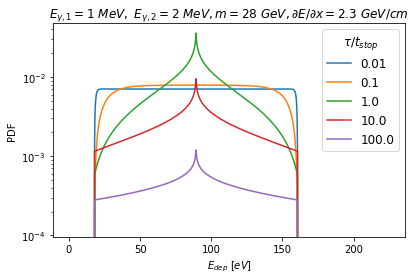

In [4]:
from scipy.special import expi

np.seterr(all='ignore')
#2-cascade constant dE/dx Energy PDF. There's also a delta function at A which is not included here
def Edep_pdf(z, A, B, C, tau):
    return ((A-B<z) & (z<A+B))*(np.exp(-B/(C*tau))/(2*C*tau)) * (expi(B/(C*tau)) - expi(np.abs(z-A)/(C*tau)) - expi(-np.abs(z-A)/(C*tau)) )

#The delta function height
#This occurs at A
def delta_height(A, B, C, tau):
    return np.exp(-B/(C*tau))

fig, ax = plt.subplots()
zz=np.linspace(0,225,1000)
                  
Eg1=1e6 #[eV]
Eg2=2e6 #[eV]
dEdx=230e9 #[eV/m]
m=28e9# [eV]
tstop=Eg1/dEdx

A=(Eg1**2+Eg2**2)/(2*m)
B=Eg1*Eg2/m
C=Eg2*dEdx/m

for ratio in np.logspace(-2,2,5):
    tau=tstop*ratio
    a,=ax.plot(zz,Edep_pdf(zz,A,B,C,tau),label=str(ratio))
    
    #ax.plot(A,delta_height(A, B, C, tau),'o',color=a.get_color(),fillstyle='none')
    #ax.axvline(A,ymin=0,ymax=delta_height(A, B, C, tau),linestyle='--',color=a.get_color())

ax.set_title(r'$E_{\gamma,1}=1~MeV,~E_{\gamma,2}=2~MeV,m=28~GeV,\partial E/\partial x=2.3~GeV/cm$')

ax.set_xlabel(r'$E_{dep}~[eV]$')
ax.set_ylabel('PDF')
ax.set_yscale('log')
#ax.set_ylim(5e-4,4e-2)

plt.rcParams['legend.title_fontsize'] = 'large'
ax.legend(title=r'$\tau/t_{stop}$',fontsize='large');

plt.tight_layout()
plt.savefig('figures/n2gamma_Edep_pdf.png')

We see that, for short decay times, we get a uniform distribution because the total energy just depends on emission angle. At longer decay times, a peak appears around A, as it becomes less likely for the second decay to occur in-flight.

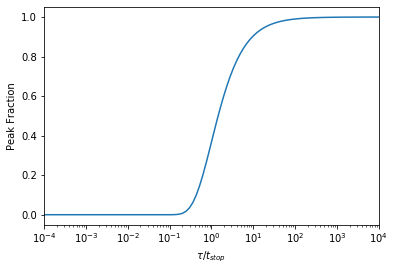

In [5]:
#Fraction of events in the delta function peak
fig,ax = plt.subplots()

tratio=np.logspace(-4,4,100)
ax.plot(tratio,np.exp(-1/tratio))

ax.set_xscale('log')
ax.set_xlim(1e-4,1e4)

ax.set_xlabel(r'$\tau/t_{stop}$')
ax.set_ylabel(r'Peak Fraction')
plt.savefig('figures/n2gamma_fpeak_v_lifetime.png')